# EXPLORING FEATURES AND DEFINING SUCCESS METRICS

The goal of this project is to investigate what makes an AirBnb listing successful. In order to do so, we look into all of the listings of a single city: Amsterdam. This information is contained in a specific .csv file.


Before proceding to the investigation, three preliminary steps are necessary: 
- evaluating the quality of the data
- defining measures of success
- choosing a broad ensemble of parameters that will be used as features




### DATA EXPLORATION 

Before attempting to find an answer to our research question, the usability of the data must be evaluated. In particular, we need to identify what kind of information our data contains. 

In [8]:
#load listing and review data
df_listings = pd.read_csv('../data/2019-09-14_Amsterdam_listings_detailed.csv', header=0)
df_comments = pd.read_csv('../data/2019-09-14_Amsterdam_reviews.csv', header=0)

In order to analyze the data contained in the '...listings_detailed.csv' file, we proceed in answering the following questions:

    1. How many listings are there in this city ? Are they all unique ?
    2. What information can we get for a particular listing ?
    3. Are there missing values ? Do they make us lose valuable information ?
    4. Can the data be used as such or should it be transformed ?


In [9]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190914033014,2019-09-14,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
1,20168,https://www.airbnb.com/rooms/20168,20190914033014,2019-09-14,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.48
2,25428,https://www.airbnb.com/rooms/25428,20190914033014,2019-09-14,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.15
3,27886,https://www.airbnb.com/rooms/27886,20190914033014,2019-09-14,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.14
4,28871,https://www.airbnb.com/rooms/28871,20190914033014,2019-09-14,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.67


In [40]:
# check proportion of missing features
total_cell_nbr = df_listings.shape[0]*df_listings.shape[1]
percentage_missing = df_listings.isna().sum().sum()/total_cell_nbr*100
print('Fraction of missing values in the dataframe: '+ str(round(percentage_missing,3))+'%')
print('')
print('The eight columns with the most missing data are (with % Nan in column): ')
display(df_listings.isna().sum().divide(df_listings.shape[0]/100).nlargest(8).round(2))
print('')
frac_in_5 = df_listings.isna().sum().nlargest(8).sum()/df_listings.isna().sum().sum()
print('Together, they account for: '+ str(round(frac_in_5*100,2)) +'% of the missing data.')
print('')

# check if listing ids are duplicated 
print('There are: ' + str(df_listings.duplicated('id', keep = False).sum()) + ' duplicated listing ids')

# check if listing ids are Nan or empty values
print('There are : ' + str(df_listings['id'].isna().sum()) + ' Nan values under id')
print('There are : ' + str(df_listings.id.loc[df_listings['id'] == ''].sum()) + ' empty values under id')

Fraction of missing values in the dataframe: 13.997%

The six columns with the most missing data are (with % Nan in column): 


thumbnail_url                   100.00
medium_url                      100.00
xl_picture_url                  100.00
host_acceptance_rate            100.00
neighbourhood_group_cleansed    100.00
license                          99.84
square_feet                      98.17
monthly_price                    93.40
dtype: float64


Together, they account for: 53.34% of the missing data.

There are: 0 duplicated listing ids
There are : 0 Nan values under id
There are : 0 empty values under id


To answer the questions stated above, we can observe the following:

- There are 106 columns in this dataset, one of which is the listing id, the others all contain different types of information about the listings.
- Each row of the dataset corresponds to a different listing.
- There are no missing listing ids.
- More than half of the missing data comes from eight columns, that are for the most part not essential parameters. 
- The neighbourhood information can be obtained from an other column: 'neibourhood_cleansed'.
- The 'square_feet' column, however could have been an intersting parameter.
- Some columns contain string type data, others contain numerical values.

From this analysis, we infer that the data is of sufficient quality to build success metrics and features of listing information that impact these success metrics. We can thus proceed to the next step: defining success metrics. 




### SUCCESS METRICS

To obtain accurate representations of how successful an AirBnb listing is, we go over the different kinds of information provided by the dataset containing the details of listing and identify the best success metrics. We also look into the other files provided by the Inside Airbnb dataset to construct other metrics.

In [42]:
import warnings 
warnings.simplefilter('ignore')

In [43]:
from comment_analysis import *

#### 1. Metric selection

In [5]:
#glimpse at the info contained in the listing dataframe
df_listings.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


By taking a look at the columns of this dataframe, it appears that some columns would intuitively be more suited than others to be chosen as success metrics.

These columns are:
- 'review_scores_rating'
- 'review_scores_accuracy'
- 'review_scores_cleanliness'
- 'review_scores_checkin'
- 'review_scores_communication'
- 'review_scores_location'
- 'review_scores_value'
- 'reviews_per_month'

Apart from the 'reviews_per_month' column, these columns are all averages of scores given to a listing by guests. These scores give some insight into the rating of a listing.

An other aspect we want to include as metric is the frequency at which a listing booked. To do so, we identified a column potentially suited to measure the booking frequency: 'reviews_per_month'. The values in this column average the number of reviews per month for a particular listing. It should be noted that not all guests leave reviews and that guests book a stay for different amounts of time. This value is thus not an exact measure of the number of nights booked per months, but rather an approximative indicator of the demand for a listing.

As it turns out, the 'review_scores_rating' values are calculated as weighted sum of the other 'review_scores_...'.
We can thus consider that all the other scores are taken into account in this one, such that it is necessary only for this metric to be kept.

Therefore, the remaining columns of interest are:
- 'review_scores_rating'
- 'reviews_per_month'

Alternatively, we could keep all the 'review_scores_...' columns and drop 'review_scores_rating', if we want to investigate specific aspects, such as cleanliness, communication, location...


#### 2. Metric construction

An other quantity can be used as a measure of a listing's succes: the positive/negative sentiment of the comments left by the reviewers. Comments for all the listings of a given city can be found a '...reviews.csv' file. From this file, the comments were processed and a sentiment analysis was performed (refer to the commentsAnalysis.ipynb notebook for a complete exploration and step-by-step anlaysis of the reviews data). In doing so, we were able to extract two different measures of sentiment: the average negative and the average positive sentiments for each listing.

This data contains 484507 lines.
There are 17587 different housings in this city.


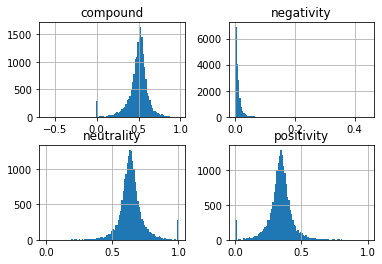

In [7]:
# add comment sentiment metric

# analyze comment data for each listing
_, _, comments_en_copy = analyze_comments(df_comments) #this step is very long!
df_comments_sentiment = comments_en_copy.copy()

# as the previous step takes some time to run, the result is saved and can be loaded for further use
df_comments_sentiment.to_pickle("./df_comments_sentiment.pkl")

# drop 'neutrality' and 'compound' columns
df_comments_sentiment.drop(columns = ['neutrality', 'compound'], inplace = True)

In [ ]:
# uncomment to load stored comment analysis data 
#df_comments_sentiment = pd.read_pickle("./df_comments_sentiment.pkl")

From the sentiment analysis, we only keep the positivy and negativity of the overall comments for each listing.
Success can thus be defined by the 4 following metrics:

- 'review_scores_rating'
- 'reviews_per_month'
- 'positive_sentiment'
- 'negative_sentiment'

The remaining columns (not used as metrics) will be further inspected in order to pre-select features.

In [11]:
# create a new dataframe for success metrics
df_success_metrics = pd.merge(df_listings[['id', 'review_scores_rating', 'reviews_per_month']],
                              df_comments_sentiment, left_on='id', right_on='listing_id')

df_success_metrics.head()

,id,review_scores_rating,reviews_per_month,negativity,positivity
0,2818,98.0,2.11,0.008359,0.303975
1,20168,88.0,2.48,0.017532,0.314667
2,25428,100.0,0.15,0.000000,0.224000
3,27886,99.0,2.14,0.012159,0.362951
4,28871,97.0,2.67,0.008462,0.374759


#### 3. Metric analysis

In [12]:
print('The metric review_scores_rating is in the range: ['+ str(df_success_metrics.review_scores_rating.min())+', '+str(df_success_metrics.review_scores_rating.max())+']')
print('The metric reviews_per_month is in the range: ['+ str(df_success_metrics.reviews_per_month.min())+', '+str(df_success_metrics.reviews_per_month.max())+']')
print('The metric negativity is in the range: ['+ str(df_success_metrics.negativity.min())+', '+str(df_success_metrics.negativity.max())+']')
print('The metric positivity is in the range: ['+ str(df_success_metrics.positivity.min())+', '+str(df_success_metrics.positivity.max())+']')

The metric review_scores_rating is in the range: [20.0, 100.0]
The metric reviews_per_month is in the range: [0.01, 52.24]
The metric negativity is in the range: [0.0, 0.444]
The metric positivity is in the range: [0.0, 1.0]


Our metrics are all numerical values that vary in a certain range.

In [13]:
# check for Nan values in each metric
for col in df_success_metrics:
    print('There are : ' + str(df_success_metrics[col].isna().sum()) + ' Nan values under ' + col)

print('')

c = (df_success_metrics == '').sum(axis=0)
# check for empty values in each metric
for col in df_success_metrics:
    print('There are : ' + str(c[col]) + ' empty values under ' + col)

There are : 0 Nan values under id
There are : 224 Nan values under review_scores_rating
There are : 0 Nan values under reviews_per_month
There are : 0 Nan values under negativity
There are : 0 Nan values under positivity

There are : 0 empty values under id
There are : 0 empty values under review_scores_rating
There are : 0 empty values under reviews_per_month
There are : 0 empty values under negativity
There are : 0 empty values under positivity


In [14]:
# drop rows with Nan values
df_success_metrics.dropna(axis = 0, inplace = True)

In [15]:
# save final success metrics dataframe
df_success_metrics.to_pickle("./df_success_metrics.pkl")

### CHOOSING FEATURES

Finally the success metrics are obtained, cleaned and ready for further use (ML) ..?

plots?